In [297]:
import numpy as np

In [298]:
import pandas as pd 

In [299]:
import matplotlib.pyplot as pyp 

In [300]:
import seaborn as sn

In [301]:
data=pd.read_excel("E:\AI ML\letsupgrade\Material\Day 21\Linear Regression.xlsx")

In [302]:
data

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [303]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [304]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [305]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


# Checking Linear Regression between Price and sqft_living.

## 1.Converting four parameter data into two required parameters on whom test is to be performed.

In [307]:
d=pd.Series(data["price"],name="Price")

In [308]:
d2=pd.Series(data["sqft_living"],name="SL")

In [309]:
data2=pd.concat([d,d2],axis=1)

In [310]:
data2.head()

,Price,SL
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


In [311]:
data2.describe()

,Price,SL
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C8ABDE688>,
      dtype=object)

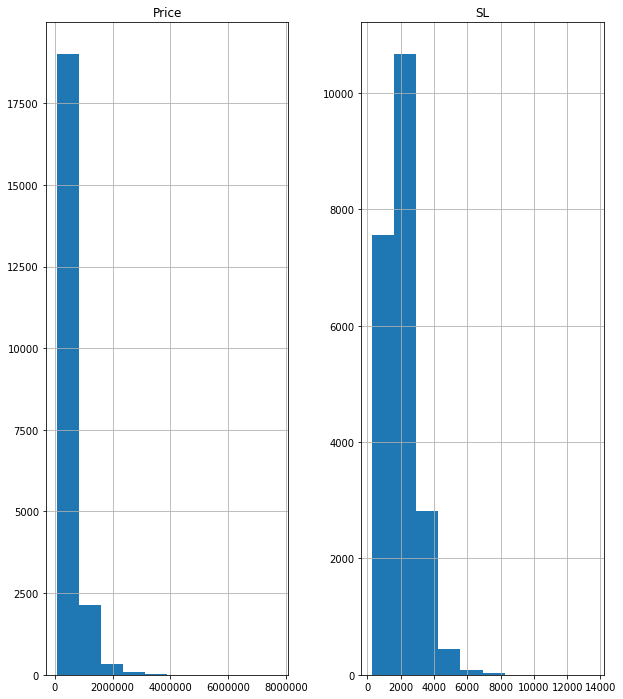

In [312]:
data2.hist(figsize=(10,12))

In [313]:
data2.corr()

,Price,SL
Price,1.000000,0.702035
SL,0.702035,1.000000


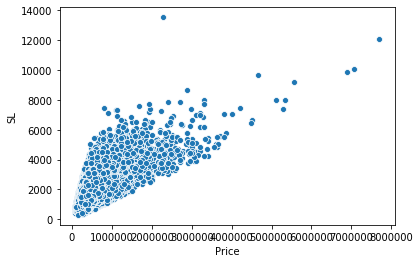

In [314]:
sn.scatterplot(data2.Price,data2.SL)

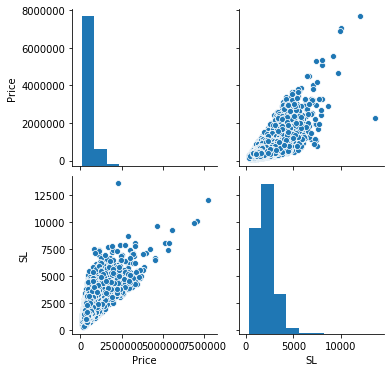

In [315]:
sn.pairplot(data2)

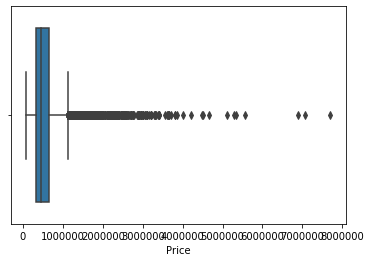

In [316]:
sn.boxplot(data2.Price)

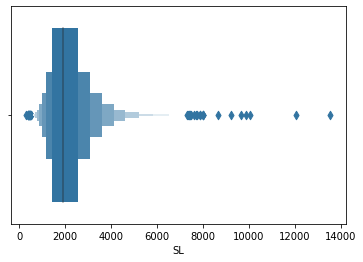

In [317]:
sn.boxenplot(data2.SL)

## Assign features to X and Y

In [318]:
x=data2.iloc[:,:1]

In [319]:
y=data2.iloc[:,1:]

In [320]:
x.head()

,Price
0,221900
1,538000
2,180000
3,604000
4,510000


In [321]:
y.head()

,SL
0,1180
1,2570
2,770
3,1960
4,1680


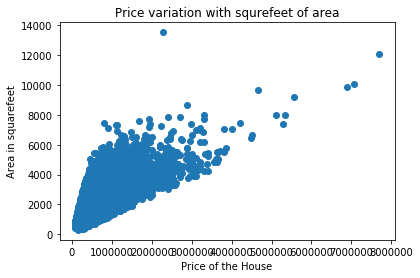

In [322]:
pyp.scatter(x, y)
pyp.title('Price variation with squrefeet of area')
pyp.xlabel('Price of the House')
pyp.ylabel('Area in squarefeet')
pyp.show()

## SPLIT DATA RECORDS FOR TRAINING AND TESTING

In [323]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [324]:
data2.shape

(21613, 2)

In [325]:
X_test.shape

(4323, 1)

## MODEL BUILDING WITH SKLEARN

In [326]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()



## TRAIN THE MODEL

In [327]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [328]:
lin_reg.coef_

array([[0.00174633]])

In [329]:
lin_reg.intercept_

array([1131.43277126])

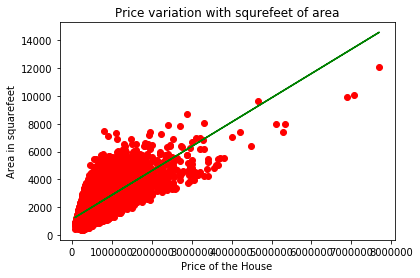

In [330]:
 #Visualise Training set result
pyp.scatter(X_train, y_train, color = 'red')
pyp.plot(X_train, lin_reg.predict(X_train), color = 'green')
pyp.title('Price variation with squrefeet of area')
pyp.xlabel('Price of the House')
pyp.ylabel('Area in squarefeet')
pyp.show()


## TEST THE MODEL

In [331]:
ypred=lin_reg.predict(X_test)
ypred

array([[2414.98599378],
       [3139.71332351],
       [1743.52175697],
       ...,
       [1825.51199343],
       [1786.30686438],
       [1494.66960158]])

In [332]:
X_test.head()

,Price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


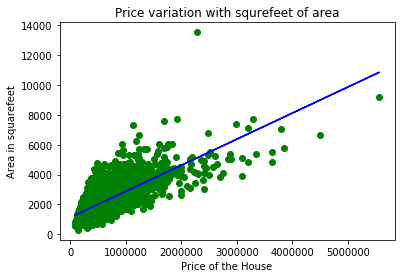

In [333]:
pyp.scatter(X_test,y_test, color = 'green')
pyp.plot(X_test,lin_reg.predict(X_test), color = 'blue')
pyp.title('Price variation with squrefeet of area')
pyp.xlabel('Price of the House')
pyp.ylabel('Area in squarefeet')
pyp.show()

## ESTIMATE THE ERRORS

In [334]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5022021804710803
The RMSE value is........ 666.5368304302992


## HOW TO PREDICT UNKNOWN VALIES

In [335]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[1137.08040544]]


# NOW MAKING LINEAR REGRESSION MODEL BETWEEN PRICE AND BEDROOMS:-

In [336]:
x=data.iloc[:,:1]

In [337]:
y=data.iloc[:,2:3]

In [338]:
x.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [339]:
y.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [340]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [341]:
from sklearn.linear_model import LinearRegression
lin_reg2=LinearRegression()

In [342]:
lin_reg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [343]:
lin_reg2.coef_

array([[7.70125623e-07]])

In [344]:
lin_reg2.intercept_

array([2.95061418])

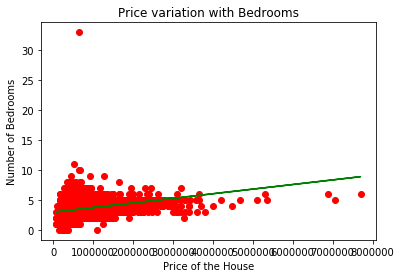

In [345]:
 #Visualise Training set result
pyp.scatter(X_train, y_train, color = 'red')
pyp.plot(X_train, lin_reg2.predict(X_train), color = 'green')
pyp.title('Price variation with Bedrooms')
pyp.xlabel('Price of the House')
pyp.ylabel('Number of Bedrooms')
pyp.show()


In [346]:
ypred=lin_reg.predict(X_test)
ypred

array([[2414.98599378],
       [3139.71332351],
       [1743.52175697],
       ...,
       [1825.51199343],
       [1786.30686438],
       [1494.66960158]])

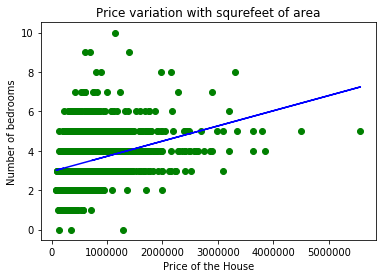

In [347]:
pyp.scatter(X_test,y_test, color = 'green')
pyp.plot(X_test,lin_reg2.predict(X_test), color = 'blue')
pyp.title('Price variation with squrefeet of area')
pyp.xlabel('Price of the House')
pyp.ylabel("Number of bedrooms")
pyp.show()

In [348]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... -5526793.293571233
The RMSE value is........ 2176.2996023563833


# NOW MAKING LINEAR REGRESSION MODEL BETWEEN PRICE AND BATHROOMS:-

In [349]:
x=data.iloc[:,:1]

In [350]:
y=data.iloc[:,3:4]

In [351]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [352]:
from sklearn.linear_model import LinearRegression
lin_reg3=LinearRegression()

In [353]:
lin_reg3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

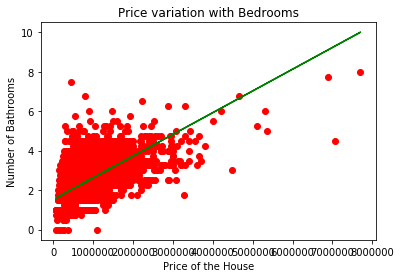

In [354]:
 #Visualise Training set result
pyp.scatter(X_train, y_train, color = 'red')
pyp.plot(X_train, lin_reg3.predict(X_train), color = 'green')
pyp.title('Price variation with Bedrooms')
pyp.xlabel('Price of the House')
pyp.ylabel('Number of Bathrooms')
pyp.show()


In [355]:
ypred=lin_reg3.predict(X_test)

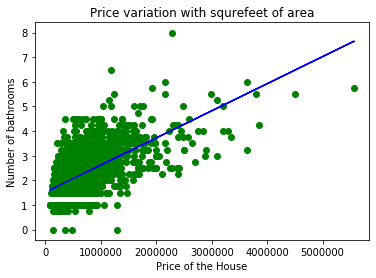

In [356]:
pyp.scatter(X_test,y_test, color = 'green')
pyp.plot(X_test,lin_reg3.predict(X_test), color = 'blue')
pyp.title('Price variation with squrefeet of area')
pyp.xlabel('Price of the House')
pyp.ylabel("Number of bathrooms")
pyp.show()

In [357]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.28127401846250877
The RMSE value is........ 0.6591011174526225


# NOW MAKING LINEAR REGRESSION MODEL BETWEEN PRICE AND FLOORS:-

In [358]:
x=data.iloc[:,:1]

In [359]:
y=data.iloc[:,4:5]

In [360]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [361]:
from sklearn.linear_model import LinearRegression
lin_reg4=LinearRegression()

In [362]:
lin_reg4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

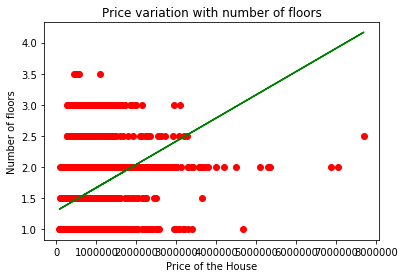

In [363]:
 #Visualise Training set result
pyp.scatter(X_train, y_train, color = 'red')
pyp.plot(X_train, lin_reg4.predict(X_train), color = 'green')
pyp.title('Price variation with number of floors')
pyp.xlabel('Price of the House')
pyp.ylabel('Number of floors')
pyp.show()


In [364]:
ypred=lin_reg4.predict(X_test)

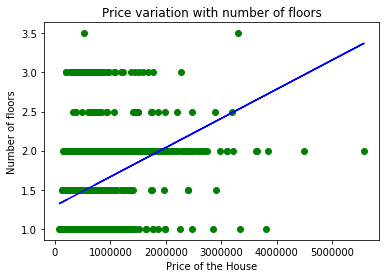

In [365]:
pyp.scatter(X_test,y_test, color = 'green')
pyp.plot(X_test,lin_reg4.predict(X_test), color = 'blue')
pyp.title('Price variation with number of floors')
pyp.xlabel('Price of the House')
pyp.ylabel("Number of floors")
pyp.show()

In [366]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.07374135097127821
The RMSE value is........ 0.5222402255396246


# NOW FINALLY MULTIPLE REGRESSION.

In [367]:
x=data.iloc[:,1:5]

In [368]:
y=data.iloc[:,:1]

In [369]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [370]:
from sklearn.linear_model import LinearRegression
mul_reg=LinearRegression(normalize=True)

In [371]:
mul_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [372]:
mul_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [373]:
ypred=mul_reg.predict(X_test)
ypred

array([[608095.96846158],
       [585712.20079792],
       [416482.58364345],
       ...,
       [683810.03201802],
       [221742.65972711],
       [426849.61955588]])

In [374]:


from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5166693554435362
The RMSE value is........ 259763.19584802483


In [375]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000
